In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
inputs = keras.Input(shape=(784,))
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [9]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


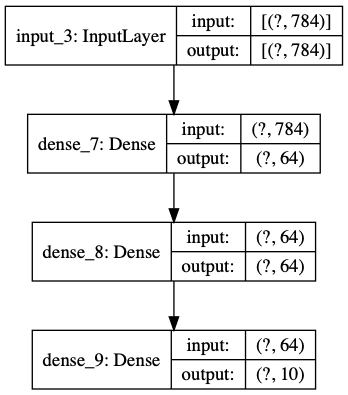

In [10]:
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

In [15]:
encoder_input = keras.Input(shape=(28,28,1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 32)                0         
Total params: 14,048
Trainable params: 14,048
Non-trainable params: 0
_______________________________________________________

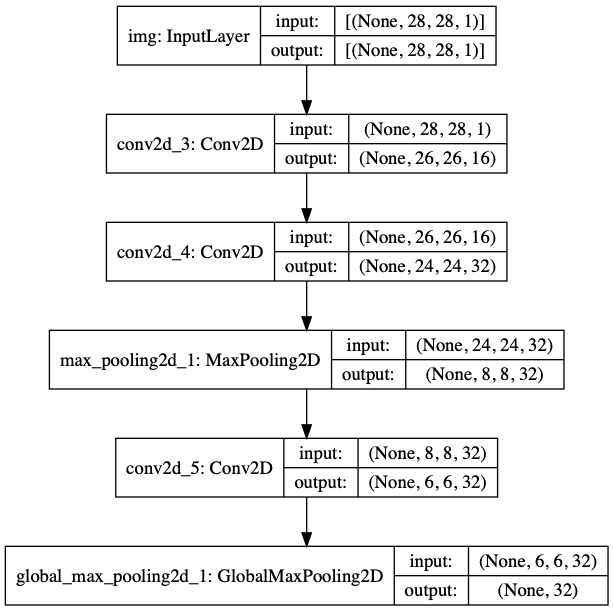

In [16]:
keras.utils.plot_model(encoder, show_shapes=True)

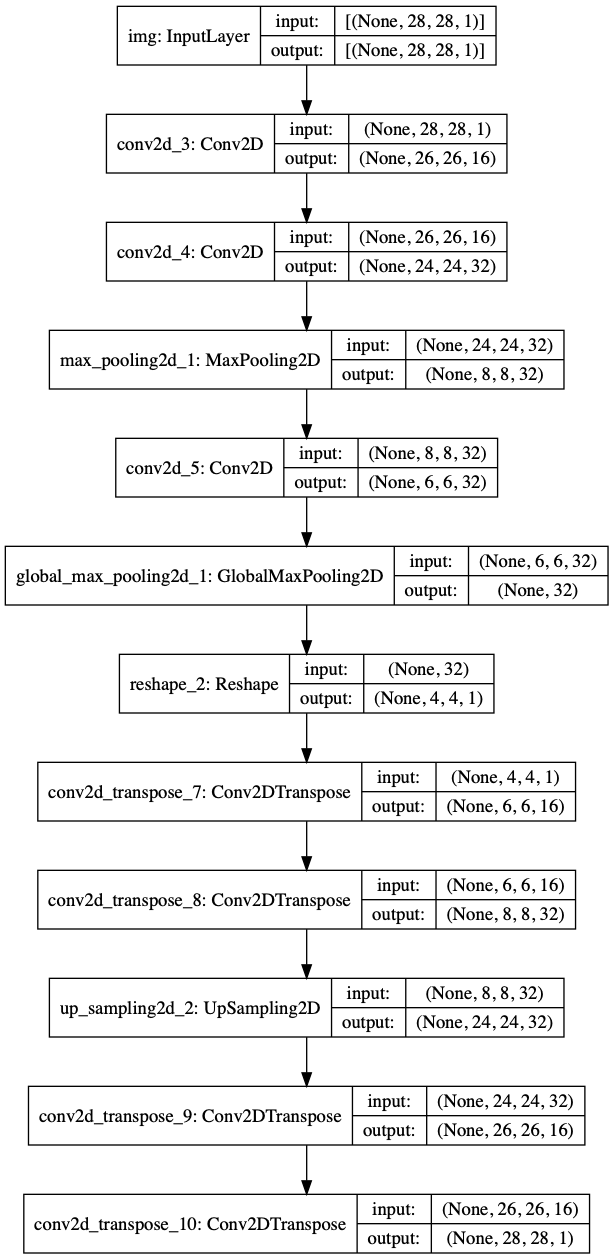

In [17]:
x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
keras.utils.plot_model(autoencoder, show_shapes=True)

In [19]:
encoder_input = keras.Input(shape=(28,28,1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 16)                0   

In [20]:
decoder_input = keras.Input(shape=(16,), name="encoder_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_img (InputLayer)     [(None, 16)]              0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 6, 6, 16)          160       
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 8, 8, 32)          4640      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 26, 26, 16)        4624      
_________________________________________________________________
conv2d_transpose_14 (Conv2DT (None, 28, 28, 1)         145 

In [21]:
autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              (None, 16)                18672     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


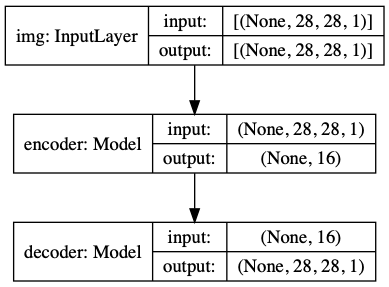

In [23]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [24]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1, activation="sigmoid")(inputs)
    return keras.Model(inputs, outputs)

In [25]:
model1 = get_model()
model2 = get_model()
model3 = get_model()

In [26]:
inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
ensemble_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_3 (Model)                 (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_4 (Model)                 (None, 1)            129         input_6[0][0]                    
____________________________________________________________________________________________

In [29]:
num_tags = 12
num_words = 10000
num_depts = 4

title = keras.Input(shape=(None,), name="title")
text = keras.Input(shape=(None,), name="text")
tags = keras.Input(shape=(num_tags,), name="tags")

title_embedding = layers.Embedding(num_words, 64)(title)
text_embedding = layers.Embedding(num_words, 64)(text)

title_features = layers.LSTM(128)(title_embedding)
text_features = layers.LSTM(128)(text_embedding)

x = layers.concatenate([title_features, text_features, tags])
priority_pred = layers.Dense(1, activation="sigmoid", name="priority")(x)
dept_pred = layers.Dense(num_depts, activation="softmax", name="dept")(x)

model = keras.Model([title, text, tags], [priority_pred, dept_pred])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
text (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, None, 64)     640000      title[0][0]                      
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, None, 64)     640000      text[0][0]                       
____________________________________________________________________________________________

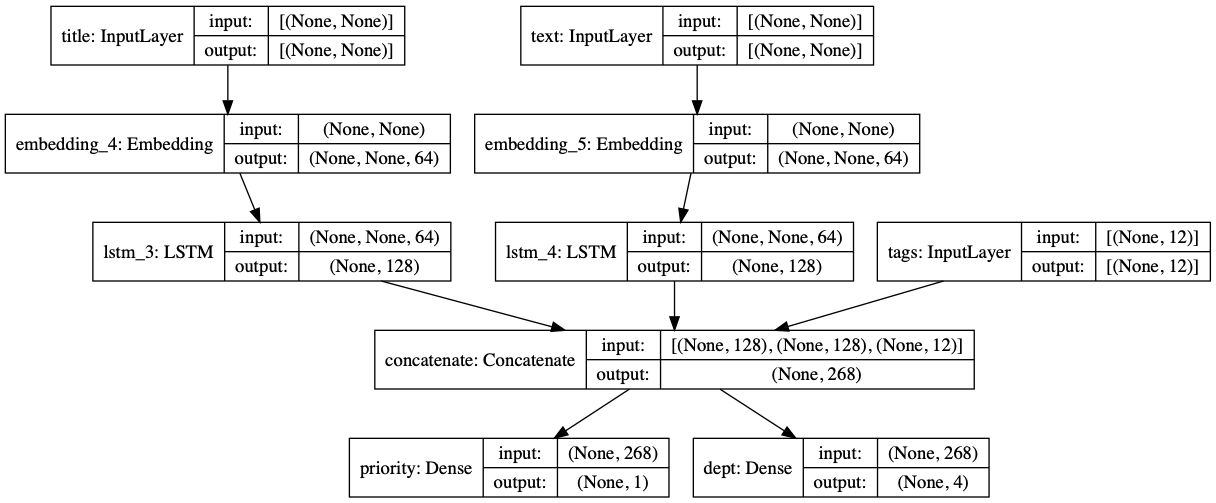

In [30]:
keras.utils.plot_model(model, show_shapes=True)

In [32]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=["binary_crossentropy", "categorical_crossentropy"],
    loss_weights=[1., 0.2]
)

In [34]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": "binary_crossentropy",
        "dept": "categorical_crossentropy"
    },
    loss_weights=[1., 0.2]
)

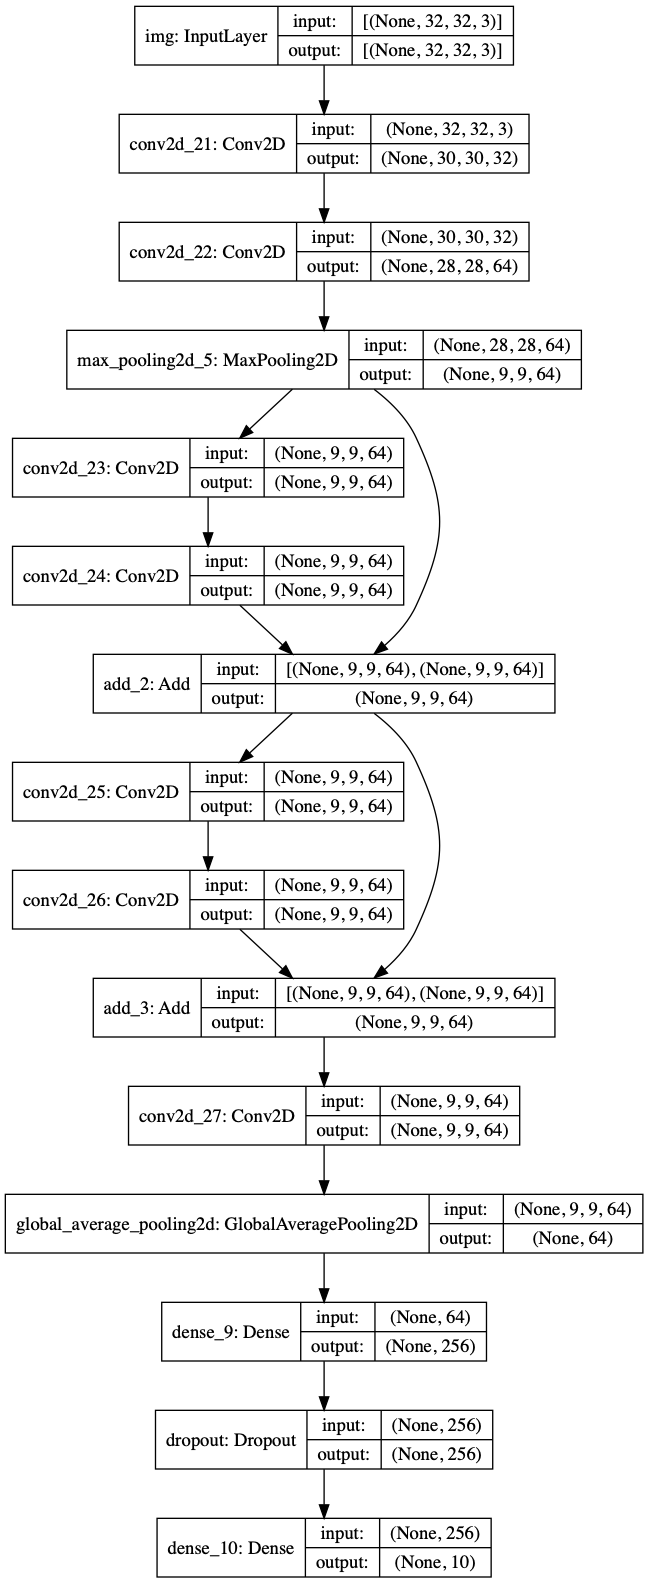

In [36]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
blk_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(blk_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
blk_2_output = layers.add([x, blk_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(blk_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
blk_3_output = layers.add([x, blk_2_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(blk_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
keras.utils.plot_model(model, show_shapes=True)

In [37]:
import tensorflow_datasets as tfds

In [39]:
cifar10, cifar10_info = tfds.load("cifar10", data_dir="/data", with_info=True)
cifar10_info

W0816 18:13:16.513682 4544726464 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


tfds.core.DatasetInfo(
    name='cifar10',
    version=1.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    urls=['https://www.cs.toronto.edu/~kriz/cifar.html'],
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [41]:
classes = cifar10_info.features["label"].names
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [52]:
elems = []
for x in cifar10["train"].take(3):
    elems.append(x)

In [53]:
type(elems[0])

dict

In [54]:
elems[0].keys()

dict_keys(['image', 'label'])

In [55]:
elems[0]["image"].shape

TensorShape([32, 32, 3])

In [56]:
testset = tfds.load("cifar10", data_dir="/data", split=tfds.Split.TEST)

In [57]:
first_80pct = tfds.Split.TRAIN.subsplit(tfds.percent[:80])
trainset = tfds.load("cifar10", data_dir="/data", split=first_80pct)

In [58]:
last_20pct = tfds.Split.TRAIN.subsplit(tfds.percent[-20:])
valset = tfds.load("cifar10", data_dir="/data", split=last_20pct)

In [70]:
def to_tpl(elem):
    return elem["image"], elem["label"]

train_ds = trainset.map(to_tpl)
train_ds = train_ds.shuffle(512)
train_ds = train_ds.batch(64, drop_remainder=True)

val_ds = valset.map(to_tpl)
val_ds = val_ds.batch(32, drop_remainder=True)

test_ds = testset.map(to_tpl)
test_ds = test_ds.batch(32, drop_remainder=True)

In [71]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss="categorical_crossentropy",
    metrics=["acc"]
)

In [72]:
model.fit(train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
625/625 [==============================] - 71s 113ms/step - loss: 103.5311 - acc: 0.2736 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/3
424/625 [===================>..........] - ETA: 22s - loss: 103.7326 - acc: 0.1203

KeyboardInterrupt: 

In [73]:
import pandas as pd

In [76]:
df = pd.DataFrame({
    "A": [1, 2, 3],
    "B": [10, 20, 30],
    "C": [100, 200, 300]
})
df

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300


In [84]:
slc = df[["A", "C"]]
slc

,A,C
0,1,100
1,2,200
2,3,300


In [85]:
slc.loc[0, "A"] = 100

/Users/avilay/.venvs/ai/lib/python3.7/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/avilay/.venvs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
df

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300


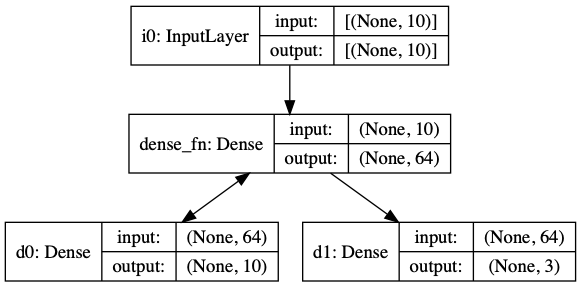

In [12]:
dense_fn = layers.Dense(64, name="dense_fn")

input_ = layers.Input(shape=(10,), name="i0")
x = dense_fn(input_)
# x = layers.Dense(64)(input_)
x = layers.Dense(10, name="d0")(x)
x = dense_fn(x)
# x = layers.Dense(64)(x)
output = layers.Dense(3, name="d1")(x)
model = keras.Model(input_, output)
keras.utils.plot_model(model, show_shapes=True)

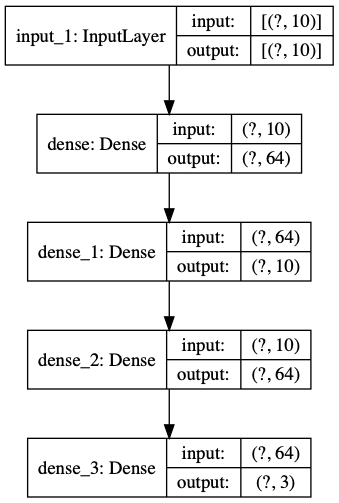

In [4]:
input_ = layers.Input(shape=(10,))
x = layers.Dense(64)(input_)
x = layers.Dense(10)(x)
x = layers.Dense(64)(x)
output = layers.Dense(3)(x)
model = keras.Model(input_, output)
keras.utils.plot_model(model, show_shapes=True)